# Assignment10
# Name : Junha Lee
# Student ID : 2017220159
# https://github.com/myosoo/Assignment10

# Import packages 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load mnist dataset

In [2]:
file_data_train = "mnist_train.csv"
file_data_test  = "mnist_test.csv"

h_data_train    = open(file_data_train, "r")
h_data_test     = open(file_data_test, "r")

data_train      = h_data_train.readlines()
data_test       = h_data_test.readlines()

h_data_train.close()
h_data_test.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_train   = len(data_train)   # number of training images
num_test    = len(data_test)    # number of testing images

# Normalize the values of the input data to be [0, 1]

In [3]:
#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

# Example of distance function between two vectors x and y

In [4]:
#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

# Make a matrix each column of which represents an images in a vector form

In [5]:
#
# make a matrix each column of which represents an images in a vector form 
#
list_image_train    = np.empty((size_row * size_col, num_train), dtype=float)
list_label_train    = np.empty(num_train, dtype=int)

list_image_test     = np.empty((size_row * size_col, num_test), dtype=float)
list_label_test     = np.empty(num_test, dtype=int)

count = 0

for line in data_train:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_train[count]     = label
    list_image_train[:, count]  = im_vector    

    count += 1

count = 0

for line in data_test:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_test[count]      = label
    list_image_test[:, count]   = im_vector    

    count += 1

# Plot first 150 images out of 10,000 with their labels

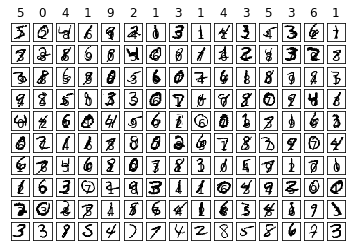

In [6]:
# 
# plot first 150 images out of 10,000 with their labels
# 
f1 = plt.figure(1)

for i in range(150):

    label       = list_label_train[i]
    im_vector   = list_image_train[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 15, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

# Define random vector $\mathbf{r_i}$

In [7]:
n = 784 # size_row * size_col

def random_vector(n, p):
    r = np.empty((n, p))
    for i in range(p):
        mu = 0
        sigma = 1
        r[:,i] = np.random.normal(mu, sigma, n)
    return r

# Inner product $\mathbf{r_i}$ and our training dataset : $\mathbf{A} = \mathbf{r_i}^T\cdot\mathbf{x}$

In [8]:
def inner_product_train(X):
    A = np.transpose(np.matmul(np.array(X), list_image_train))
    return A

# Define and compute our model parameter : $\mathbf{Parameters} = (\mathbf{A}^T\mathbf{A})^\mathbf{-1}\mathbf{A}^T\cdot\mathbf{y}$

In [9]:
def model_parameter(x, label):
    theta = np.matmul(np.linalg.pinv(x), np.array(label))
    return theta

# Define label classifier

In [10]:
label_trains = []

for label in range(10):
    label_train = np.empty(num_train)
    for i in range(num_train):    
        if list_label_train[i] != label:
            label_train[i] = -1 # Label is uncorrect
        else:
            label_train[i] = 1 # Label is correct 
            
    label_trains.append(label_train)

# Define F1score : $\mathbf{F_1} = \left(\frac{\mathbf{recall}^{-1} + \mathbf{precision}^{-1}}{2}\right)^{-1} = 2 \cdot \frac{\mathbf{precision} \cdot \mathbf{recall}}{\mathbf{precision} + \mathbf{recall}}$

In [11]:
def F1score(M):
    score = np.empty(10)
    for i in range(10):
        TP = 0; FP = 0; FN = 0
        for j in range(10):        
            if i == j:
                TP = TP + M.iloc[i,j]
            elif i != j:
                FN = FN + M.iloc[i,j]
            elif i != j:
                FP = FP + M.iloc[j,i]
    
        score[i] = 2 * ((TP / (TP + FP)) * (TP / (TP + FN))) / ((TP / (TP + FP)) + (TP / (TP + FN)))
        
    return np.mean(score)

# Define and Present the confusion matrix M(i, j) that indicates the number of classification for the digit i as the digit j

In [12]:
def inner_product_test(X):
    A = np.transpose(np.matmul(np.array(X), list_image_test))
    return A

def classifier(p): # training model parameters
    r = random_vector(n, p).T
    A_train = inner_product_train(r)
    theta_train = []
    for i in range(10):
        theta_train.append(model_parameter(A_train,label_trains[i]))
    
    A_test = inner_product_test(r)
    y_tilde = []
    for i in range(10): # y_hat = argmax(y_tilde) !!!
        y_tilde.append(np.matmul(A_test, theta_train[i]))
    predicted = np.empty(num_test, dtype=int)
    
    for i in range(num_test):
        best = 0
        for j in range(1,10):
            if y_tilde[best][i] < y_tilde[j][i]:
                best = j
        predicted[i] = best
    list = np.zeros((10,10), dtype=int)
    for i in range(num_test):
        pred = predicted[i]
        label_test = list_label_test[i]
        list[pred][label_test] += 1 
        matrix_form = {'0' : list[0,:],
                       '1' : list[1,:],
                       '2' : list[2,:],
                       '3' : list[3,:],
                       '4' : list[4,:],
                       '5' : list[5,:],
                       '6' : list[6,:],
                       '7' : list[7,:],
                       '8' : list[8,:],
                       '9' : list[9,:]}       
        cm = pd.DataFrame(matrix_form)
    return cm

# Range of p is : $\mathbf{N} = (2^0, 2^1, 2^2, 2^3, 2^4, 2^5, 2^6, 2^7, 2^8, 2^9, 2^{10})$ 

In [13]:
p = [2 ** 0, 2 ** 1, 2 ** 2, 2 ** 3, 2 ** 4, 2 ** 5, 2 ** 6, 2 ** 7, 2 ** 8, 2 ** 9, 2 ** 10]

# Present the each F1 score with different number of parameters p and find the best F1 score.

In [14]:
score = []

for i in p: 
    confusion_matrix = classifier(i)
    score.append(F1score(confusion_matrix))
    
    print("p: {}".format(i))
    print("f1 score: {}".format(F1score(confusion_matrix)))
    print("=======================================================")
    print(confusion_matrix)
    print("=======================================================")
    
print(score)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]


p: 1
f1 score: nan
     0  1  2  3  4  5  6  7  8    9
0  858  0  0  0  0  0  0  0  0  122
1  380  0  0  0  0  0  0  0  0  755
2  838  0  0  0  0  0  0  0  0  194
3  625  0  0  0  0  0  0  0  0  385
4  418  0  0  0  0  0  0  0  0  564
5  430  0  0  0  0  0  0  0  0  462
6  781  0  0  0  0  0  0  0  0  177
7  481  0  0  0  0  0  0  0  0  547
8  545  0  0  0  0  0  0  0  0  429
9  323  0  0  0  0  0  0  0  0  686
p: 2
f1 score: nan
   0  1  2  3  4  5    6    7    8    9
0  0  7  0  0  0  0  533   74  194  172
1  0  4  0  0  0  0  378  453  210   90
2  0  5  0  0  0  0  749   85  128   65
3  0  9  0  0  0  0  550  151  128  172
4  0  2  0  0  0  0  411   17  347  205
5  0  7  0  0  0  0  387   37  190  271
6  0  1  0  0  0  0  812   39   62   44
7  0  9  0  0  0  0  327  495   97  100
8  0  2  0  0  0  0  414   35  380  143
9  0  1  0  0  0  0  367   43  292  306
p: 4
f1 score: nan
     0    1    2    3   4  5    6    7    8  9
0  903    1   14   18   0  1   20   16    7  0
1    1  603  

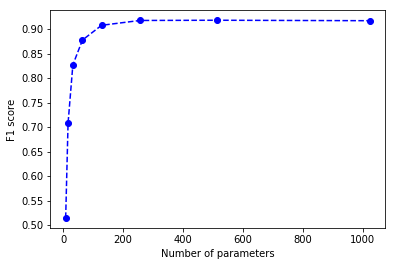

In [15]:
plt.plot(p, score, color = 'b', marker = 'o', linestyle = '--')
plt.xlabel('Number of parameters')
plt.ylabel('F1 score')
plt.show()